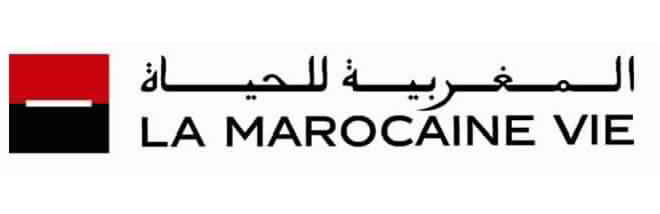

In [61]:
import pandas as pd 
#import mathplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta
from sklearn.preprocessing import StandardScaler

In [62]:
data=pd.read_csv("MASI_2.csv",parse_dates=True, index_col=0)

data

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2002-01-03,3684.51,3694.96,3640.00,3640.00,0,MAD
2002-01-04,3641.08,3671.50,3640.00,3671.50,0,MAD
2002-01-07,3670.56,3674.71,3662.56,3667.30,0,MAD
2002-01-08,3655.56,3657.54,3639.32,3641.65,0,MAD
2002-01-09,3637.89,3645.03,3627.77,3644.19,0,MAD
...,...,...,...,...,...,...
2022-05-16,12682.21,12738.15,12648.59,12682.77,0,MAD
2022-05-17,12682.77,12733.07,12681.66,12716.65,0,MAD
2022-05-18,12716.65,12749.42,12672.62,12679.96,0,MAD


In [63]:
df=pd.read_csv("MASI_2.csv",parse_dates=True, index_col=0)

df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2002-01-03,3684.51,3694.96,3640.00,3640.00,0,MAD
2002-01-04,3641.08,3671.50,3640.00,3671.50,0,MAD
2002-01-07,3670.56,3674.71,3662.56,3667.30,0,MAD
2002-01-08,3655.56,3657.54,3639.32,3641.65,0,MAD
2002-01-09,3637.89,3645.03,3627.77,3644.19,0,MAD
...,...,...,...,...,...,...
2022-05-16,12682.21,12738.15,12648.59,12682.77,0,MAD
2022-05-17,12682.77,12733.07,12681.66,12716.65,0,MAD
2022-05-18,12716.65,12749.42,12672.62,12679.96,0,MAD


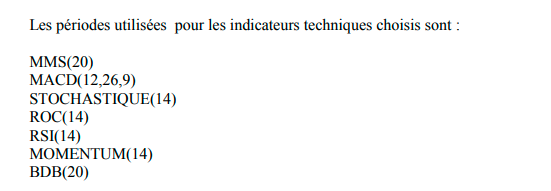

In [64]:
sma10 = df.ta.sma(length=10)
SMA=pd.DataFrame(sma10)
SMA

,SMA_10
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,12869.139
2022-05-17,12827.139
2022-05-18,12780.746


In [65]:
bbands=df.ta.bbands()
BB=pd.DataFrame(bbands)
BL=BB["BBB_5_2.0"]

In [66]:
macd=df.ta.macd()
macd=pd.DataFrame(macd)
macd=macd["MACD_12_26_9"]

In [67]:
RSI=df.ta.rsi()
rsi=pd.DataFrame(RSI)
rsi

,RSI_14
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,34.756526
2022-05-17,37.551468
2022-05-18,35.764656


In [68]:
roc=df.ta.roc()
roc=pd.DataFrame(roc)
roc


,ROC_10
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,-3.440292
2022-05-17,-3.197162
2022-05-18,-3.529625


In [69]:
mom=df.ta.mom(length=10)
mom=pd.DataFrame(mom)
mom

,MOM_10
Date,
2002-01-03,NaN
2002-01-04,NaN
2002-01-07,NaN
2002-01-08,NaN
2002-01-09,NaN
...,...
2022-05-16,-451.87
2022-05-17,-420.00
2022-05-18,-463.93


In [70]:
stoch=df.ta.stoch( k=14, d=3, smooth_k=3)
stoch=pd.DataFrame(stoch)
stoch
stoch=stoch["STOCHk_14_3_3"]

In [71]:
data_IS=pd.concat([macd,stoch,mom,RSI,SMA,roc,BL],axis=1)
data_IS

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC_10,BBB_5_2.0
Date,,,,,,,
2002-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-09,NaN,NaN,NaN,NaN,NaN,NaN,1.487083
...,...,...,...,...,...,...,...
2022-05-16,-75.920155,12.522124,-451.87,34.756526,12869.139,-3.440292,1.296902
2022-05-17,-79.715526,20.516124,-420.00,37.551468,12827.139,-3.197162,1.547484
2022-05-18,-84.707505,20.488464,-463.93,35.764656,12780.746,-3.529625,1.551148


In [72]:
data_IS=data_IS.dropna()
data_IS

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC_10,BBB_5_2.0
Date,,,,,,,
2002-02-08,-4.893728,13.378683,-64.05,35.023643,3667.719,-1.733461,1.950378
2002-02-11,-8.829266,6.236266,-82.00,28.739497,3659.519,-2.222367,2.278811
2002-02-12,-9.853643,18.264537,-51.52,40.875801,3654.367,-1.398544,1.866047
2002-02-13,-10.753725,23.921693,-42.67,40.088134,3650.100,-1.161926,1.123814
2002-02-14,-11.877223,32.126890,-52.42,38.052419,3644.858,-1.426270,1.000496
...,...,...,...,...,...,...,...
2022-05-16,-75.920155,12.522124,-451.87,34.756526,12869.139,-3.440292,1.296902
2022-05-17,-79.715526,20.516124,-420.00,37.551468,12827.139,-3.197162,1.547484
2022-05-18,-84.707505,20.488464,-463.93,35.764656,12780.746,-3.529625,1.551148


In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data_IS)
print(scaled)

[[0.61169712 0.13378683 0.66539304 ... 0.05849386 0.56470539 0.06525917]
 [0.60850197 0.06236266 0.66117245 ... 0.0577972  0.5525013  0.07676191]
 [0.6076703  0.18264537 0.66833923 ... 0.05735949 0.5730656  0.06230564]
 ...
 [0.54689861 0.20488464 0.57136912 ... 0.83272202 0.51986946 0.05127692]
 [0.54451804 0.20439805 0.57663839 ... 0.82897093 0.5239833  0.0126252 ]
 [0.53999627 0.15481264 0.58065912 ... 0.82536513 0.52679932 0.02884483]]


In [75]:
data_IS_SCALED=pd.DataFrame(scaled)
data_IS_SCALED


,0,1,2,3,4,5,6
0,0.611697,0.133787,0.665393,0.334410,0.058494,0.564705,0.065259
1,0.608502,0.062363,0.661172,0.262370,0.057797,0.552501,0.076762
2,0.607670,0.182645,0.668339,0.401497,0.057359,0.573066,0.062306
3,0.606940,0.239217,0.670420,0.392468,0.056997,0.578972,0.036310
4,0.606027,0.321269,0.668128,0.369131,0.056552,0.572374,0.031991
...,...,...,...,...,...,...,...
5051,0.554033,0.125221,0.574205,0.331347,0.840232,0.522099,0.042372
5052,0.550951,0.205161,0.581698,0.363388,0.836663,0.528168,0.051149
5053,0.546899,0.204885,0.571369,0.342904,0.832722,0.519869,0.051277
5054,0.544518,0.204398,0.576638,0.343079,0.828971,0.523983,0.012625


In [76]:
data_IS.describe()

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC_10,BBB_5_2.0
count,5056.000000,5056.000000,5056.000000,5056.000000,5056.000000,5056.000000,5056.000000
mean,12.806421,56.491480,17.840245,53.001293,9598.092942,0.290289,2.266778
std,113.178798,31.341189,290.425801,15.922023,3115.691259,2.976808,2.101451
min,-758.334851,0.000000,-2893.940000,5.852657,2979.219000,-24.356012,0.087059
25%,-43.357549,27.922139,-108.987500,41.494772,8775.648500,-1.189069,1.034439
50%,12.807714,60.462078,19.505000,52.997866,10327.320500,0.255849,1.628909
75%,72.782939,86.273330,150.552500,64.443558,11751.963500,1.690847,2.771458
max,473.387687,100.000000,1359.020000,93.083972,14749.686000,15.704790,28.639660


In [77]:

#minmax_scaling(data_IS["STOCHk_14_3_3"], columns=[0, 1])

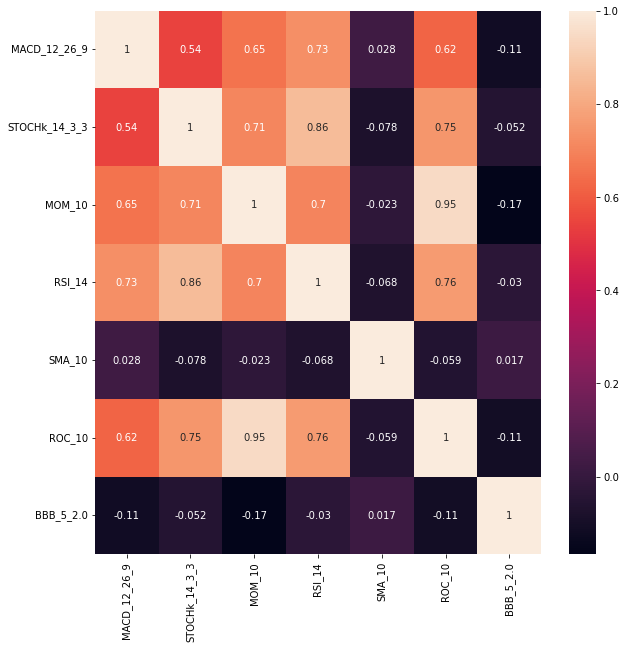

In [78]:
corr_data = data_IS.corr(method='pearson')

plt.figure(figsize=(10, 10))
sns.heatmap(corr_data, annot=True)
plt.show()

In [79]:
from sklearn.decomposition import PCA
#affichage des paramètres
acp= PCA(n_components=7)

In [80]:
#calculs
coord = acp.fit_transform(data_IS)
#nombre de composantes calculées
print(acp.n_components_) 


7


In [81]:
#variance expliquée
print(acp.explained_variance_)


[9.70759481e+06 9.09353403e+04 6.83387352e+03 5.30685204e+02
 3.80494883e+01 4.19714341e+00 7.14107762e-01]


In [82]:
#valeur corrigée
eigval = (7-1)/7*acp.explained_variance_
print(eigval)

[8.32079555e+06 7.79445774e+04 5.85760587e+03 4.54873032e+02
 3.26138471e+01 3.59755150e+00 6.12092368e-01]


In [83]:
print(acp.explained_variance_ratio_)

[9.89971091e-01 9.27349768e-03 6.96911785e-04 5.41187618e-05
 3.88024987e-06 4.28020609e-07 7.28240161e-08]


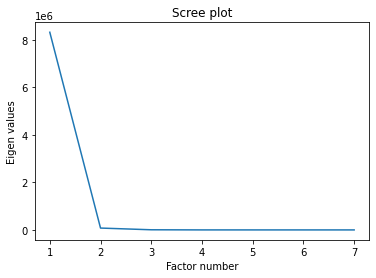

In [84]:
plt.plot(np.arange(1,8),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


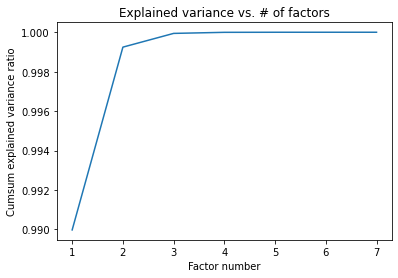

In [85]:
#cumul de variance expliquée
plt.plot(np.arange(1,8),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


# Volet Backend de l'interface n°1 : réaliser une ACP(Output dataFrame)

___________________________
______________________

In [86]:
scaler=StandardScaler()
scaler.fit(data_IS)
scaled_data=scaler.transform(data_IS)
pca_out=PCA(n_components=6).fit(data_IS)
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["Composante principale n°"+str(i) for i in (range(1, 7))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_IS.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,Composante principale n°1,Composante principale n°2,Composante principale n°3,Composante principale n°4,Composante principale n°5,Composante principale n°6
variable,,,,,,
MACD_12_26_9,-0.001007,-0.267272,-0.960257,-0.063246,-0.049543,0.002861
STOCHk_14_3_3,0.000781,-0.074263,-0.023619,0.937754,-0.338413,0.004534
MOM_10,0.002180,-0.959934,0.271568,-0.068482,0.001933,0.001330
RSI_14,0.000349,-0.038542,-0.059924,0.334099,0.937743,-0.043192
SMA_10,-0.999997,-0.001896,0.001520,0.000764,0.000119,-0.000020
ROC_10,0.000057,-0.009309,0.002421,0.014479,0.045219,0.046869
BBB_5_2.0,-0.000012,0.001152,-0.000209,0.009792,0.040140,0.997952


_____________________
_______________________

In [87]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(7,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [88]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

     Val.Propre    Seuils
0  8.320796e+06  2.592857
1  7.794458e+04  1.592857
2  5.857606e+03  1.092857
3  4.548730e+02  0.759524
4  3.261385e+01  0.509524
5  3.597551e+00  0.309524
6  6.120924e-01  0.142857


In [89]:
#INTERFACE 
loadings_df

,Composante principale n°1,Composante principale n°2,Composante principale n°3,Composante principale n°4,Composante principale n°5,Composante principale n°6
variable,,,,,,
MACD_12_26_9,-0.001007,-0.267272,-0.960257,-0.063246,-0.049543,0.002861
STOCHk_14_3_3,0.000781,-0.074263,-0.023619,0.937754,-0.338413,0.004534
MOM_10,0.002180,-0.959934,0.271568,-0.068482,0.001933,0.001330
RSI_14,0.000349,-0.038542,-0.059924,0.334099,0.937743,-0.043192
SMA_10,-0.999997,-0.001896,0.001520,0.000764,0.000119,-0.000020
ROC_10,0.000057,-0.009309,0.002421,0.014479,0.045219,0.046869
BBB_5_2.0,-0.000012,0.001152,-0.000209,0.009792,0.040140,0.997952


In [90]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

______________________

In [91]:
"{:.3%}".format(pca_out.explained_variance_ratio_[0])

'98.997%'

In [92]:
var_axe_1=pca_out.explained_variance_ratio_[0]
var_axe_1

0.9899710906748602

In [93]:
"{:.3%}".format(pca_out.explained_variance_ratio_[1])

'0.927%'

In [94]:
var_axe_2=pca_out.explained_variance_ratio_[1]
var_axe_2


0.00927349768419654

In [95]:
"{:.3%}".format(pca_out.explained_variance_ratio_[2])

'0.070%'

In [96]:
#variance 
var_axe_3=pca_out.explained_variance_ratio_[2]
var_axe_3

0.0006969117846954722

In [97]:
var_axe_4=pca_out.explained_variance_ratio_[3]
var_axe_4

5.4118761755259795e-05

In [98]:
var_axe_5=pca_out.explained_variance_ratio_[4]
var_axe_5

3.880249867033199e-06

In [99]:
var_axe_6=pca_out.explained_variance_ratio_[5]
var_axe_6

4.280206091800361e-07

## Volet Backend Interface n°2 : calcul des pourcentage de variance (Output valeurs a stoker)

In [100]:
var_axe_1
var_axe_2
var_axe_3
var_axe_4
var_axe_5
var_axe_6

4.280206091800361e-07

In [101]:
"{:.3%}".format(pca_out.explained_variance_ratio_[0]+pca_out.explained_variance_ratio_[1]+pca_out.explained_variance_ratio_[3])

'99.930%'

________________________________________________________________


## Volet Backend Interface n°3 : Opérations à realiser sur le dataframe (Output valeurs a stoker)

&nbsp;
> Elever au carré le dataFrame ==> caree
> Effectuer la somme de chaque colonne puis la stocker dans une variable ==> Somme_Composante_n°
> Diviser caree sur Somme composante_n° ==> DataFrame contenant des colonne "PC_n°_SUR_somme_n°"
> Ce dernier dataFrame prendre chaque colonne puis la multiplier par la variance corespondante.
> Pour obtenir les poids il va falloir faire une somme des lignes pour avoir les poids de chaque indicateurs. 


# Construction de l'indicateurs syntetique moyennant une ACP 

### Calcul du carée de la matrice 

In [102]:
carre=loadings_df**2

### Calcul de la somme des valeurs selon chaque composante 

In [103]:
#COLONE 
Somme_Composante_1=carre["Composante principale n°1"].sum()
Somme_Composante_2=carre["Composante principale n°2"].sum()
Somme_Composante_3=carre["Composante principale n°3"].sum()
Somme_Composante_4=carre["Composante principale n°4"].sum()
Somme_Composante_5=carre["Composante principale n°5"].sum()
Somme_Composante_6=carre["Composante principale n°6"].sum()
#Somme_Composante_7=carre["Composante principale n°7"].sum()


### Construction de 6 colonnes contenant les Carrées sur les sommes 

In [104]:
#INTERFACE
carre["PC1_SUR_somme_1"]=carre["Composante principale n°1"]/Somme_Composante_1
carre["PC1_SUR_somme_1"]
carre["PC2_SUR_somme_2"]=carre["Composante principale n°2"]/Somme_Composante_2
carre["PC2_SUR_somme_2"]
carre["PC3_SUR_somme_3"]=carre["Composante principale n°3"]/Somme_Composante_3
carre["PC3_SUR_somme_3"]
carre["PC4_SUR_somme_4"]=carre["Composante principale n°4"]/Somme_Composante_4
carre["PC4_SUR_somme_4"]
carre["PC5_SUR_somme_5"]=carre["Composante principale n°5"]/Somme_Composante_5
carre["PC5_SUR_somme_5"]
carre["PC6_SUR_somme_6"]=carre["Composante principale n°6"]/Somme_Composante_6
carre["PC6_SUR_somme_6"]
"""
carre["PC7_SUR_somme_7"]=carre["Composante principale n°7"]/Somme_Composante_7
carre["PC7_SUR_somme_7"]
carre
"""


'\ncarre["PC7_SUR_somme_7"]=carre["Composante principale n°7"]/Somme_Composante_7\ncarre["PC7_SUR_somme_7"]\ncarre\n'

### S'asurer que les sommes valent 1 

In [105]:
carre["Composante principale n°1"].sum()
carre["Composante principale n°2"].sum()
carre["Composante principale n°3"].sum()
carre["Composante principale n°4"].sum()
carre["Composante principale n°5"].sum()
carre["Composante principale n°6"].sum()
"""
carre["Composante principale n°7"].sum()
"""
carre["Composante principale n°6"].sum()

0.9999999999999994

# Dans ce qui suit nous allons retenir 7 AXES pour construire IS  

In [106]:
carre["var_fois_pc_1"]=var_axe_1*carre["PC1_SUR_somme_1"]
carre["var_fois_pc_2"]=var_axe_2*carre["PC2_SUR_somme_2"]
carre["var_fois_pc_3"]=var_axe_3*carre["PC3_SUR_somme_3"]
carre["var_fois_pc_4"]=var_axe_4*carre["PC4_SUR_somme_4"]
carre["var_fois_pc_5"]=var_axe_5*carre["PC5_SUR_somme_5"]
carre["var_fois_pc_6"]=var_axe_6*carre["PC6_SUR_somme_6"]
carre

,Composante principale n°1,Composante principale n°2,Composante principale n°3,Composante principale n°4,Composante principale n°5,Composante principale n°6,PC1_SUR_somme_1,PC2_SUR_somme_2,PC3_SUR_somme_3,PC4_SUR_somme_4,PC5_SUR_somme_5,PC6_SUR_somme_6,var_fois_pc_1,var_fois_pc_2,var_fois_pc_3,var_fois_pc_4,var_fois_pc_5,var_fois_pc_6
variable,,,,,,,,,,,,,,,,,,
MACD_12_26_9,1.013929e-06,0.071434,9.220936e-01,4.000058e-03,2.454515e-03,8.185938e-06,1.013929e-06,0.071434,9.220936e-01,4.000058e-03,2.454515e-03,8.185938e-06,1.003760e-06,6.624466e-04,6.426179e-04,2.164782e-07,9.524130e-09,3.503750e-12
STOCHk_14_3_3,6.101215e-07,0.005515,5.578484e-04,8.793820e-01,1.145233e-01,2.055685e-05,6.101215e-07,0.005515,5.578484e-04,8.793820e-01,1.145233e-01,2.055685e-05,6.040026e-07,5.114273e-05,3.887711e-07,4.759106e-05,4.443791e-07,8.798755e-12
MOM_10,4.753664e-06,0.921474,7.374944e-02,4.689748e-03,3.735809e-06,1.768219e-06,4.753664e-06,0.921474,7.374944e-02,4.689748e-03,3.735809e-06,1.768219e-06,4.705990e-06,8.545283e-03,5.139685e-05,2.538034e-07,1.449587e-11,7.568340e-13
RSI_14,1.218464e-07,0.001485,3.590866e-03,1.116221e-01,8.793625e-01,1.865585e-03,1.218464e-07,0.001485,3.590866e-03,1.116221e-01,8.793625e-01,1.865585e-03,1.206244e-07,1.377570e-05,2.502517e-06,6.040851e-06,3.412146e-06,7.985086e-10
SMA_10,9.999935e-01,0.000004,2.309786e-06,5.839856e-07,1.420850e-08,4.171155e-10,9.999935e-01,0.000004,2.309786e-06,5.839856e-07,1.420850e-08,4.171155e-10,9.899647e-01,3.333003e-08,1.609717e-09,3.160458e-11,5.513255e-14,1.785340e-16
ROC_10,3.217798e-09,0.000087,5.863583e-06,2.096440e-04,2.044740e-03,2.196670e-03,3.217798e-09,0.000087,5.863583e-06,2.096440e-04,2.044740e-03,2.196670e-03,3.185527e-09,8.036902e-07,4.086400e-09,1.134567e-08,7.934103e-09,9.402201e-10
BBB_5_2.0,1.342939e-10,0.000001,4.358660e-08,9.588863e-05,1.611204e-03,9.959072e-01,1.342939e-10,0.000001,4.358660e-08,9.588863e-05,1.611204e-03,9.959072e-01,1.329471e-10,1.230221e-08,3.037601e-11,5.189374e-09,6.251876e-09,4.262688e-07


In [107]:
Tableau_pour_IS=carre[["var_fois_pc_1","var_fois_pc_2","var_fois_pc_3","var_fois_pc_4","var_fois_pc_5","var_fois_pc_6"]]
Tableau_pour_IS


,var_fois_pc_1,var_fois_pc_2,var_fois_pc_3,var_fois_pc_4,var_fois_pc_5,var_fois_pc_6
variable,,,,,,
MACD_12_26_9,1.003760e-06,6.624466e-04,6.426179e-04,2.164782e-07,9.524130e-09,3.503750e-12
STOCHk_14_3_3,6.040026e-07,5.114273e-05,3.887711e-07,4.759106e-05,4.443791e-07,8.798755e-12
MOM_10,4.705990e-06,8.545283e-03,5.139685e-05,2.538034e-07,1.449587e-11,7.568340e-13
RSI_14,1.206244e-07,1.377570e-05,2.502517e-06,6.040851e-06,3.412146e-06,7.985086e-10
SMA_10,9.899647e-01,3.333003e-08,1.609717e-09,3.160458e-11,5.513255e-14,1.785340e-16
ROC_10,3.185527e-09,8.036902e-07,4.086400e-09,1.134567e-08,7.934103e-09,9.402201e-10
BBB_5_2.0,1.329471e-10,1.230221e-08,3.037601e-11,5.189374e-09,6.251876e-09,4.262688e-07


## Obtention des poids

In [108]:
IS = Tableau_pour_IS.sum(axis = 1)
IS

variable
MACD_12_26_9     1.306294e-03
STOCHk_14_3_3    1.001710e-04
MOM_10           8.601640e-03
RSI_14           2.585263e-05
SMA_10           9.899647e-01
ROC_10           8.311821e-07
BBB_5_2.0        4.501756e-07
dtype: float64

In [109]:
poids=pd.DataFrame({"IS_Acp_poids": [0.037408,0.435295,0.020150,0.147635,0.310509,0.024018,0.024004]})
poids

,IS_Acp_poids
0,0.037408
1,0.435295
2,0.020150
3,0.147635
4,0.310509
5,0.024018
6,0.024004


In [110]:
scaled_data__=pd.DataFrame(scaled_data)

In [111]:
scaled_data__.columns

RangeIndex(start=0, stop=7, step=1)

In [112]:
scaled_data__.rename(columns = { '0': 'MACD_12_26_9', '1': 'P-STOCHk_14_3_3' },inplace=True)
scaled_data__.columns


Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [113]:
scaled_data__.rename(columns={scaled_data__.columns[0]:'MACD_12_26_9'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[1]:'STOCHk_14_3_3'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[2]:'MOM_10'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[3]:'RSI_14'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[4]:'SMA_10'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[5]:'ROC'}, inplace=True)
scaled_data__
scaled_data__.rename(columns={scaled_data__.columns[6]:'BBB_5_2.0'}, inplace=True)
scaled_data__


,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC,BBB_5_2.0
0,-0.156406,-1.375732,-0.281994,-1.129218,-1.903578,-0.679906,-0.150577
1,-0.191183,-1.603646,-0.343806,-1.523939,-1.906210,-0.844161,0.005727
2,-0.200235,-1.219824,-0.238846,-0.761630,-1.907864,-0.567387,-0.190711
3,-0.208188,-1.039304,-0.208371,-0.811105,-1.909233,-0.487891,-0.543946
4,-0.218116,-0.777475,-0.241945,-0.938973,-1.910916,-0.576701,-0.602635
...,...,...,...,...,...,...,...
5051,-0.784028,-1.403064,-1.617476,-1.145996,1.049966,-1.253339,-0.461572
5052,-0.817566,-1.147975,-1.507730,-0.970439,1.036484,-1.171657,-0.342318
5053,-0.861677,-1.148858,-1.659005,-1.082673,1.021593,-1.283352,-0.340574
5054,-0.887587,-1.150411,-1.581835,-1.081715,1.007421,-1.227984,-0.865791


In [114]:
poids

,IS_Acp_poids
0,0.037408
1,0.435295
2,0.020150
3,0.147635
4,0.310509
5,0.024018
6,0.024004


In [118]:
scaled_data__["MACD_12_26_9_p"]=scaled_data__["MACD_12_26_9"]*0.037408
scaled_data__
scaled_data__["STOCHk_14_3_3_p"]=scaled_data__["STOCHk_14_3_3"]*0.435295
scaled_data__["MOM_10_p"]=scaled_data__["MOM_10"]*0.020150
scaled_data__["RSI_14_p"]=scaled_data__["RSI_14"]*0.147635
scaled_data__["SMA_10_p"]=scaled_data__["SMA_10"]*0.310509
scaled_data__["ROC_p"]=scaled_data__["ROC"]*0.024004
scaled_data__["BBB_5_2.0_p"]=scaled_data__["BBB_5_2.0"]*0.024018
scaled_data__

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC,BBB_5_2.0,MACD_12_26_9_p,STOCHk_14_3_3_p,MOM_10_p,RSI_14_p,SMA_10_p,ROC_p,BBB_5_2.0_p
0,-0.156406,-1.375732,-0.281994,-1.129218,-1.903578,-0.679906,-0.150577,-0.005851,-0.598849,-0.005682,-0.166712,-0.591078,-0.016320,-0.003617
1,-0.191183,-1.603646,-0.343806,-1.523939,-1.906210,-0.844161,0.005727,-0.007152,-0.698059,-0.006928,-0.224987,-0.591895,-0.020263,0.000138
2,-0.200235,-1.219824,-0.238846,-0.761630,-1.907864,-0.567387,-0.190711,-0.007490,-0.530983,-0.004813,-0.112443,-0.592409,-0.013620,-0.004581
3,-0.208188,-1.039304,-0.208371,-0.811105,-1.909233,-0.487891,-0.543946,-0.007788,-0.452404,-0.004199,-0.119748,-0.592834,-0.011711,-0.013065
4,-0.218116,-0.777475,-0.241945,-0.938973,-1.910916,-0.576701,-0.602635,-0.008159,-0.338431,-0.004875,-0.138625,-0.593357,-0.013843,-0.014474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5051,-0.784028,-1.403064,-1.617476,-1.145996,1.049966,-1.253339,-0.461572,-0.029329,-0.610747,-0.032592,-0.169189,0.326024,-0.030085,-0.011086
5052,-0.817566,-1.147975,-1.507730,-0.970439,1.036484,-1.171657,-0.342318,-0.030583,-0.499708,-0.030381,-0.143271,0.321838,-0.028124,-0.008222
5053,-0.861677,-1.148858,-1.659005,-1.082673,1.021593,-1.283352,-0.340574,-0.032234,-0.500092,-0.033429,-0.159840,0.317214,-0.030806,-0.008180
5054,-0.887587,-1.150411,-1.581835,-1.081715,1.007421,-1.227984,-0.865791,-0.033203,-0.500768,-0.031874,-0.159699,0.312813,-0.029477,-0.020795


In [119]:
scaled_data__=scaled_data__.set_index(data_IS.index)

In [120]:
scaled_data__

,MACD_12_26_9,STOCHk_14_3_3,MOM_10,RSI_14,SMA_10,ROC,BBB_5_2.0,MACD_12_26_9_p,STOCHk_14_3_3_p,MOM_10_p,RSI_14_p,SMA_10_p,ROC_p,BBB_5_2.0_p
Date,,,,,,,,,,,,,,
2002-02-08,-0.156406,-1.375732,-0.281994,-1.129218,-1.903578,-0.679906,-0.150577,-0.005851,-0.598849,-0.005682,-0.166712,-0.591078,-0.016320,-0.003617
2002-02-11,-0.191183,-1.603646,-0.343806,-1.523939,-1.906210,-0.844161,0.005727,-0.007152,-0.698059,-0.006928,-0.224987,-0.591895,-0.020263,0.000138
2002-02-12,-0.200235,-1.219824,-0.238846,-0.761630,-1.907864,-0.567387,-0.190711,-0.007490,-0.530983,-0.004813,-0.112443,-0.592409,-0.013620,-0.004581
2002-02-13,-0.208188,-1.039304,-0.208371,-0.811105,-1.909233,-0.487891,-0.543946,-0.007788,-0.452404,-0.004199,-0.119748,-0.592834,-0.011711,-0.013065
2002-02-14,-0.218116,-0.777475,-0.241945,-0.938973,-1.910916,-0.576701,-0.602635,-0.008159,-0.338431,-0.004875,-0.138625,-0.593357,-0.013843,-0.014474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,-0.784028,-1.403064,-1.617476,-1.145996,1.049966,-1.253339,-0.461572,-0.029329,-0.610747,-0.032592,-0.169189,0.326024,-0.030085,-0.011086
2022-05-17,-0.817566,-1.147975,-1.507730,-0.970439,1.036484,-1.171657,-0.342318,-0.030583,-0.499708,-0.030381,-0.143271,0.321838,-0.028124,-0.008222
2022-05-18,-0.861677,-1.148858,-1.659005,-1.082673,1.021593,-1.283352,-0.340574,-0.032234,-0.500092,-0.033429,-0.159840,0.317214,-0.030806,-0.008180


In [121]:
scaled_data__.columns

Index(['MACD_12_26_9', 'STOCHk_14_3_3', 'MOM_10', 'RSI_14', 'SMA_10', 'ROC',
       'BBB_5_2.0', 'MACD_12_26_9_p', 'STOCHk_14_3_3_p', 'MOM_10_p',
       'RSI_14_p', 'SMA_10_p', 'ROC_p', 'BBB_5_2.0_p'],
      dtype='object')

In [122]:
scaled_data__p=scaled_data__[["MACD_12_26_9_p","STOCHk_14_3_3_p","MOM_10_p","RSI_14_p","SMA_10_p","ROC_p","BBB_5_2.0_p"]]

In [123]:
scaled_data__p["IS_final"]=scaled_data__p.sum(axis=1)

C:\Users\pc\AppData\Local\Temp/ipykernel_22896/1744137866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data__p["IS_final"]=scaled_data__p.sum(axis=1)


In [124]:
scaled_data__p

,MACD_12_26_9_p,STOCHk_14_3_3_p,MOM_10_p,RSI_14_p,SMA_10_p,ROC_p,BBB_5_2.0_p,IS_final
Date,,,,,,,,
2002-02-08,-0.005851,-0.598849,-0.005682,-0.166712,-0.591078,-0.016320,-0.003617,-1.388109
2002-02-11,-0.007152,-0.698059,-0.006928,-0.224987,-0.591895,-0.020263,0.000138,-1.549146
2002-02-12,-0.007490,-0.530983,-0.004813,-0.112443,-0.592409,-0.013620,-0.004581,-1.266338
2002-02-13,-0.007788,-0.452404,-0.004199,-0.119748,-0.592834,-0.011711,-0.013065,-1.201748
2002-02-14,-0.008159,-0.338431,-0.004875,-0.138625,-0.593357,-0.013843,-0.014474,-1.111765
...,...,...,...,...,...,...,...,...
2022-05-16,-0.029329,-0.610747,-0.032592,-0.169189,0.326024,-0.030085,-0.011086,-0.557004
2022-05-17,-0.030583,-0.499708,-0.030381,-0.143271,0.321838,-0.028124,-0.008222,-0.418451
2022-05-18,-0.032234,-0.500092,-0.033429,-0.159840,0.317214,-0.030806,-0.008180,-0.447367


<AxesSubplot:xlabel='Date', ylabel='IS_final'>

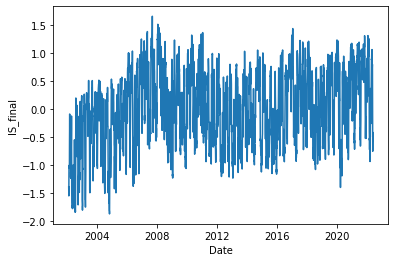

In [125]:
sns.lineplot(data=scaled_data__p, x="Date", y="IS_final")

In [126]:
Test_datascaled=scaled_data__p.iloc[4900:5000]
t=Test_datascaled.index
TEST_data=data.loc[t]


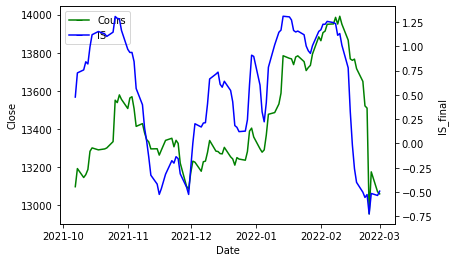

In [127]:
from matplotlib.lines import Line2D
    
g = sns.lineplot(data=TEST_data.Close, color="g")
sns.lineplot(data=Test_datascaled.IS_final, color="b", ax=g.axes.twinx())
g.legend(handles=[Line2D([], [], marker='_', color="g", label='Cours'), Line2D([], [], marker='_', color="b", label='IS')])


In [ ]:
##BackTesting 


In [ ]:
from matplotlib.lines import Line2D
    
g = sns.lineplot(data=data.Close, color="g")
sns.lineplot(data=scaled_data__p.IS_final, color="b", ax=g.axes.twinx())
g.legend(handles=[Line2D([], [], marker='_', color="g", label='column1'), Line2D([], [], marker='_', color="b", label='column2')])


_____________________